In [133]:
# import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
import numpy as np
import math
from sklearn.metrics.pairwise import euclidean_distances,cosine_similarity
import scipy.cluster.hierarchy as sch
from scipy.spatial import distance
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Data
data = pd.read_csv('Data/spiral-dataset.csv') 

print(data.info())
print(data.shape) #(312, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
X             312 non-null float64
Y             312 non-null float64
ClusterNum    312 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.4 KB
None
(312, 3)


# _Task1:Generate a figure from the given dataset that resembles Figure 1._

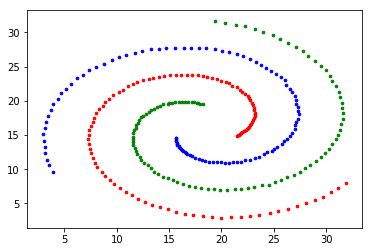

In [3]:
dataset = np.array(data)
x = dataset[:,0]
y = dataset[:,1]
clustnum = dataset[:,2]
colors = ['g', 'b', 'r']
X = np.array(list(zip(x, y)))

for i in range(len(X)):
    j = int(clustnum[i])
    plt.scatter(x[i], y[i], s=7, c=colors[j-1])


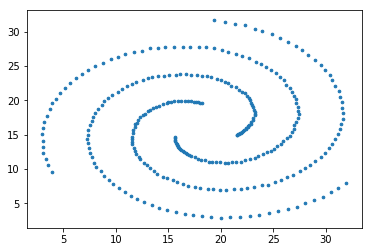

In [4]:
# Dataset Plot Without showing true clustering
plt.scatter(x, y, s=7)

# _Task 2:Implement the k-means clustering algorithm. And do the following:_

## _Task 2.a : Run your k-means algorithm on the given dataset setting the value k=3._

In [5]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [6]:
#----------------Initial Centroid selection-------------------

# Number of clusters
k = 3
# X coordinates of random initial centroids
C_x = np.random.randint(0, np.max(X)-5, size=k)
# Y coordinates of random initial centroids
C_y = np.random.randint(0, np.max(X)-5, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[23. 14.]
 [24.  6.]
 [ 4.  7.]]


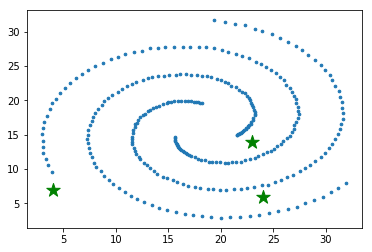

In [7]:
# ---------Plotting the initial Centroids-----------------
plt.scatter(x, y, s=7) #c='#050505',
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [8]:
# -------------------K means Clustring Algoriyhm----------------------------------

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print(error)


10.361529
3.0593045
1.8789272
0.8672753
0.43816918
0.31709218
0.21385485
0.089275524
0.08931842
0.0


### _E1_

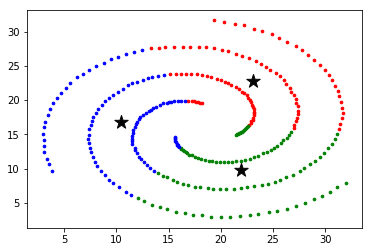

In [9]:
#--------------Plotting Clustering result with centroids----------------
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## _Task 2.b:compute the intrinsic performance metric:Sum of Squared Error(SSE) and extrinsic performance metric: Rand-Index(RI)_ 

In [10]:
#Euclidean distance
def calculate_distance(X, C):
    c_x, c_y = C
    x, y = X    
    root_diff_x = (x - c_x) ** 2
    root_diff_y = (y - c_y) ** 2
    distance = np.sqrt(root_diff_x + root_diff_y)
        
    return distance

In [11]:
#----------------------Sum of Squared Error, SSE---------------------
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

12288.175170283097


In [12]:
#-------------------------RI function----------------------
from scipy.misc import comb
from itertools import combinations
import numpy as np

def check_clusterings(labels_true, labels_pred):
    #"""Check that the two clusterings matching 1D integer arrays."""
    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)    
    # input checks
    if labels_true.ndim != 1:
        raise ValueError(
            "labels_true must be 1D: shape is %r" % (labels_true.shape,))
    if labels_pred.ndim != 1:
        raise ValueError(
            "labels_pred must be 1D: shape is %r" % (labels_pred.shape,))
    if labels_true.shape != labels_pred.shape:
        raise ValueError(
            "labels_true and labels_pred must have same size, got %d and %d"
            % (labels_true.shape[0], labels_pred.shape[0]))
    return labels_true, labels_pred

def rand_score (labels_true, labels_pred):
    #"""given the true and predicted labels, it will return the Rand Index."""
    check_clusterings(labels_true, labels_pred)
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

In [13]:
#-----------------------Rand Index (RI)---------------------------
labels_true = clustnum
labels_pred = clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5541883090114601


## _Task2.c: Repeat Task 2.a &2.b another 9 times and report what is the best SSE & RI you could get._

# _Task 3:Implement the Hierarchical clustering algorithm. And do the following:_

## _Task 3.a: Hierarchical clustering using single linkage_

In [14]:
def find_min_value_pair(distance_matrix):
    
    min_value = sys.maxsize
    matrix_size = len(distance_matrix)
    for row_value in range(0, matrix_size):
        for col_value in range(row_value+1, matrix_size):
            if distance_matrix[row_value][col_value] < min_value and not(distance_matrix[row_value][col_value] == 0):
                min_value = distance_matrix[row_value][col_value]
                row = row_value
                col = col_value
                
    return row,col
                    
#Function to perform Hierarchical Clustering                    
def hierarchial_clustering_SingleLink(cluster_data,cluster_number,distance_matrix):
    
    actual_cluster_length = len(cluster_data)
    
    while cluster_number != len(cluster_data):
        
        row,col = find_min_value_pair(distance_matrix)
        
        #Recomputing the distance matrix
        for i in range(0,len(cluster_data)):  
            distance_matrix[i][row]=min(distance_matrix[i][row],distance_matrix[i][col])
            distance_matrix[row][i]=min(distance_matrix[row][i],distance_matrix[col][i])

        #Merging the data that belong to the same cluster
        cluster_data[row].extend(cluster_data[col])
        
        #Deleting the entry for one of the merged points from distance matrix to avoid reconsidering the same value during the other iterations
        distance_matrix = np.delete(distance_matrix,col,0)    
        distance_matrix = np.delete(distance_matrix,col,1)
        
        #Removing the entry for one of the merged points from the cluster data
        cluster_data.pop(col)

        
    #An array is computed with indices as each data point and same value is assigned for all data points belonging to the same cluster
    final_clusters = np.zeros(actual_cluster_length)
    cluster_size = len(cluster_data)
    for cluster in range(0,cluster_size):
        for element in cluster_data[cluster]:
            final_clusters[element] = cluster+1;
                
    return final_clusters

In [15]:
#---------------------Main Function/Function Call----------------------------------
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = euclidean_distances(X,X)
    
final_clusters = hierarchial_clustering_SingleLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [17]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[17.523113, 14.790094],
       [20.425247, 16.325743],
       [17.36143 , 17.93238 ]], dtype=float32)

In [18]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

31730.072372428363


In [19]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

1.0


### _E2_

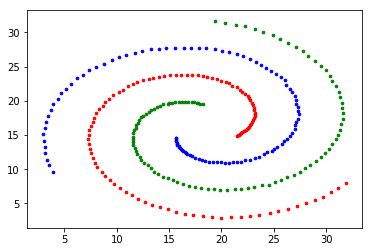

In [16]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

### _E3_

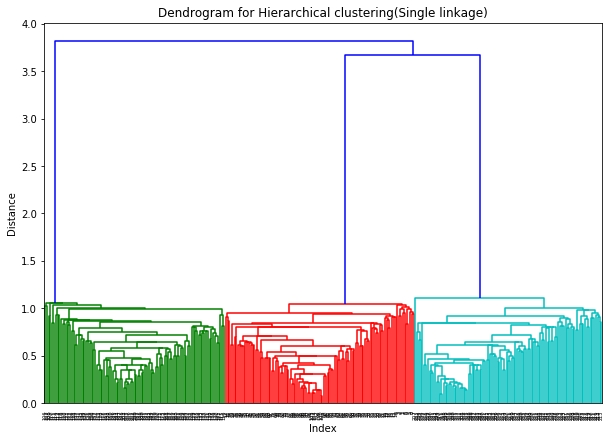

In [20]:
#Dendogram
linked =  sch.linkage(X, 'single')

plt.figure(figsize=(10, 7))  
sch.dendrogram(linked,  
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram for Hierarchical clustering(Single linkage)')
plt.xlabel('Index')
plt.ylabel('Distance');
plt.show()  

## _Task 3.b: Hierarchical clustering using complete linkage_

In [21]:
def find_min_value_pair(distance_matrix):
    
    min_value = sys.maxsize
    matrix_size = len(distance_matrix)
    for row_value in range(0, matrix_size):
        for col_value in range(row_value+1, matrix_size):
            if distance_matrix[row_value][col_value] < min_value and not(distance_matrix[row_value][col_value] == 0):
                min_value = distance_matrix[row_value][col_value]
                row = row_value
                col = col_value
                
    return row,col
                    
#Function to perform Hierarchical Clustering                    
def hierarchial_clustering_CompleteLink(cluster_data,cluster_number,distance_matrix):
    
    actual_cluster_length = len(cluster_data)
    
    while cluster_number != len(cluster_data):
        
        row,col = find_min_value_pair(distance_matrix)
        
        #Recomputing the distance matrix
        for i in range(0,len(cluster_data)):  
            distance_matrix[i][row]=max(distance_matrix[i][row],distance_matrix[i][col])
            distance_matrix[row][i]=max(distance_matrix[row][i],distance_matrix[col][i])

        #Merging the data that belong to the same cluster
        cluster_data[row].extend(cluster_data[col])
        
        #Deleting the entry for one of the merged points from distance matrix to avoid reconsidering the same value during the other iterations
        distance_matrix = np.delete(distance_matrix,col,0)    
        distance_matrix = np.delete(distance_matrix,col,1)
        
        #Removing the entry for one of the merged points from the cluster data
        cluster_data.pop(col)

        
    #An array is computed with indices as each data point and same value is assigned for all data points belonging to the same cluster
    final_clusters = np.zeros(actual_cluster_length)
    cluster_size = len(cluster_data)
    for cluster in range(0,cluster_size):
        for element in cluster_data[cluster]:
            final_clusters[element] = cluster+1;
                
    return final_clusters

In [22]:
#---------------------Main Function/Function Call----------------------------------
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = euclidean_distances(X,X)
    
final_clusters = hierarchial_clustering_CompleteLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [26]:
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[19.706667 , 11.079259 ],
       [ 7.9387097, 16.654032 ],
       [22.528261 , 22.35913  ]], dtype=float32)

In [27]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

71605.38139184719


In [28]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5509110396570204


### _E2_

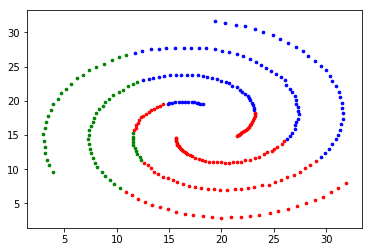

In [23]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

### _E3_

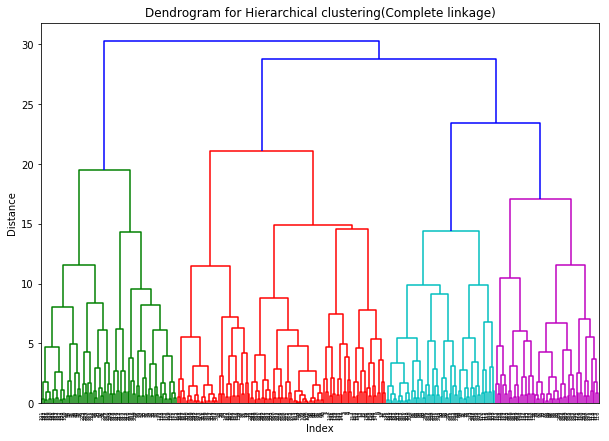

In [29]:
#Dendogram
linked =  sch.linkage(X, 'complete')

plt.figure(figsize=(10, 7))  
sch.dendrogram(linked,  
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram for Hierarchical clustering(Complete linkage)')
plt.xlabel('Index')
plt.ylabel('Distance');
plt.show()  

## _Task 3.c: Hierarchical clustering using average linkage_

In [32]:
def find_min_value_pair(distance_matrix):
    
    min_value = sys.maxsize
    matrix_size = len(distance_matrix)
    for row_value in range(0, matrix_size):
        for col_value in range(row_value+1, matrix_size):
            if distance_matrix[row_value][col_value] < min_value and not(distance_matrix[row_value][col_value] == 0):
                min_value = distance_matrix[row_value][col_value]
                row = row_value
                col = col_value
                
    return row,col
                    
#Function to perform Hierarchical Clustering                    
def hierarchial_clustering_AverageLink(cluster_data,cluster_number,distance_matrix):
    
    actual_cluster_length = len(cluster_data)
    
    while cluster_number != len(cluster_data):
        
        row,col = find_min_value_pair(distance_matrix)
        
        #Recomputing the distance matrix
        for i in range(0,len(cluster_data)):  
            distance_matrix[i][row]=(distance_matrix[i][row]+distance_matrix[i][col])/2
            distance_matrix[row][i]=(distance_matrix[row][i]+distance_matrix[col][i])/2
        #Merging the data that belong to the same cluster
        cluster_data[row].extend(cluster_data[col])
        
        #Deleting the entry for one of the merged points from distance matrix to avoid reconsidering the same value during the other iterations
        distance_matrix = np.delete(distance_matrix,col,0)    
        distance_matrix = np.delete(distance_matrix,col,1)
        
        #Removing the entry for one of the merged points from the cluster data
        cluster_data.pop(col)

        
    #An array is computed with indices as each data point and same value is assigned for all data points belonging to the same cluster
    final_clusters = np.zeros(actual_cluster_length)
    cluster_size = len(cluster_data)
    for cluster in range(0,cluster_size):
        for element in cluster_data[cluster]:
            final_clusters[element] = cluster+1;
                
    return final_clusters

In [33]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = euclidean_distances(X,X)
    
final_clusters = hierarchial_clustering_AverageLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [35]:
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[20.47857  ,  9.226021 ],
       [ 7.577551 , 15.6663265],
       [20.394848 , 20.774242 ]], dtype=float32)

In [36]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

68983.97015127192


In [37]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5374721741281226


### _E2_

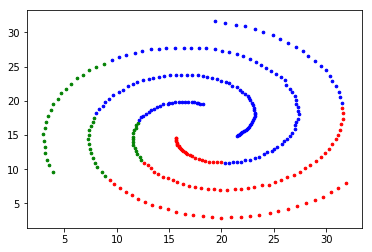

In [34]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

### _E3_

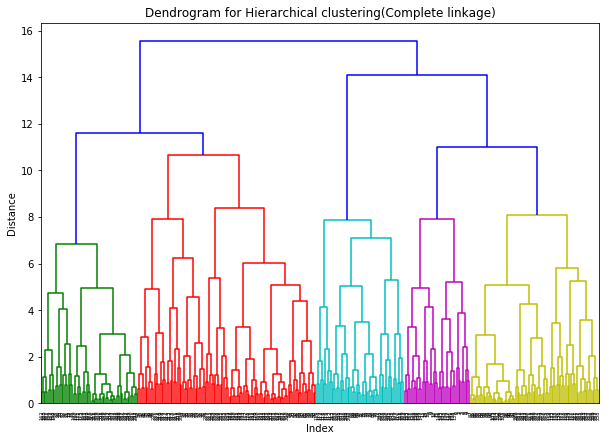

In [38]:
#Dendogram
linked =  sch.linkage(X, 'average')

plt.figure(figsize=(10, 7))  
sch.dendrogram(linked,  
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram for Hierarchical clustering(Complete linkage)')
plt.xlabel('Index')
plt.ylabel('Distance');
plt.show()  

## _Task 3.d: Hierarchical clustering using centroid linkage_

In [126]:
def find_min_value_pair(distance_matrix):
    
    min_value = sys.maxsize
    matrix_size = len(distance_matrix)
    for row_value in range(0, matrix_size):
        for col_value in range(row_value+1, matrix_size):
            if distance_matrix[row_value][col_value] < min_value and not(distance_matrix[row_value][col_value] == 0):
                min_value = distance_matrix[row_value][col_value]
                row = row_value
                col = col_value
                
    return row,col
                    
#Function to perform Hierarchical Clustering                    
def hierarchial_clustering_CentroidLink(cluster_data,cluster_number,distance_matrix):
    
    actual_cluster_length = len(cluster_data) #10
    
    while cluster_number != len(cluster_data):
        
        row,col = find_min_value_pair(distance_matrix)
        
        #Recomputing the distance matrix
        for i in range(0,len(cluster_data)):
            MergePoints = [X[row],X[col]]
            Centroid = np.mean(MergePoints, axis=0)
            dist=calculate_distance(Centroid,X[i])
            distance_matrix[i][row]=dist
            distance_matrix[row][i]=dist

        #Merging the data that belong to the same cluster
        cluster_data[row].extend(cluster_data[col])
        
        #Deleting the entry for one of the merged points from distance matrix to avoid reconsidering the same value during the other iterations
        distance_matrix = np.delete(distance_matrix,col,0)    
        distance_matrix = np.delete(distance_matrix,col,1)
        
        #Removing the entry for one of the merged points from the cluster data
        cluster_data.pop(col)

        
    #An array is computed with indices as each data point and same value is assigned for all data points belonging to the same cluster
    final_clusters = np.zeros(actual_cluster_length)
    cluster_size = len(cluster_data)
    for cluster in range(0,cluster_size):
        for element in cluster_data[cluster]:
            final_clusters[element] = cluster+1;
                
    return final_clusters

In [140]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = euclidean_distances(X,X)
    
final_clusters = hierarchial_clustering_CentroidLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [141]:
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[21.871212 ,  7.6484847],
       [11.031512 , 16.694538 ],
       [23.520472 , 20.53622  ]], dtype=float32)

In [142]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)   

72539.36928130055


In [143]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5521065215598978


### _E2_

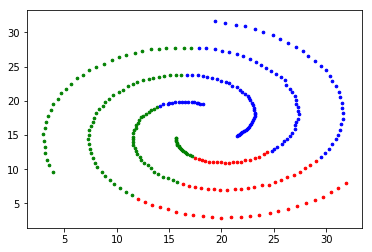

In [144]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

### _E3_

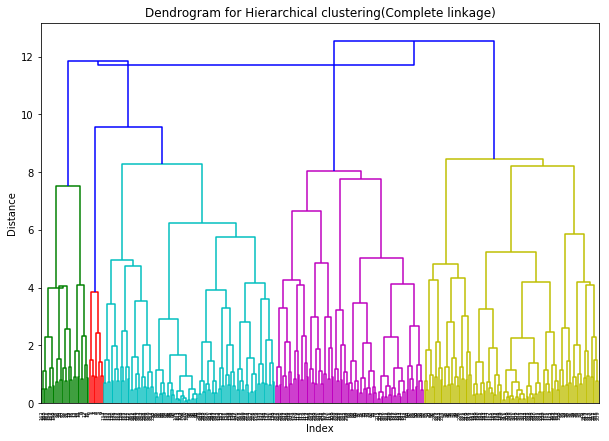

In [145]:
#Dendogram
linked =  sch.linkage(X, 'centroid')

plt.figure(figsize=(10, 7))  
sch.dendrogram(linked,  
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram for Hierarchical clustering(Complete linkage)')
plt.xlabel('Index')
plt.ylabel('Distance');
plt.show()  

## _Task 3.e:Compairing Single linkage,Complete linkage,Average linkage and centroid linkage_

# _Extra Credit option (Optional)_

## _E4 : Cosine Similarity_

### _Repeating Task 3.a using Cosine Similarity as distance function_

In [106]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = cosine_similarity(X, X)
    
final_clusters = hierarchial_clustering_SingleLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

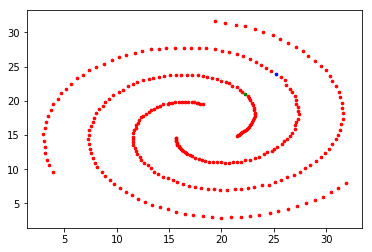

In [107]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [108]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[18.373709, 16.30516 ],
       [22.25    , 21.      ],
       [25.25    , 23.95    ]], dtype=float32)

In [109]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

60641.36286119519


In [110]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.33551817956962654


### _Repeating Task 3.b using Cosine Similarity as distance function_

In [111]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = cosine_similarity(X, X)
    
final_clusters = hierarchial_clustering_CompleteLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 2., 2., 3., 1., 2., 3., 1., 3., 2., 3., 3., 2., 1., 3., 3.,
       3., 3., 3., 1., 3., 2., 1., 2., 2., 2., 3., 3., 2., 2., 1., 1., 3.,
       3., 3., 2., 3., 1., 2., 2., 2., 2., 1., 2., 1., 3., 2., 3., 1., 3.,
       3., 3., 1., 3., 2., 3., 1., 1., 1., 3., 2., 3., 1., 2., 3., 3., 2.,
       3., 3., 3., 1., 1., 1., 1., 3., 3., 3., 3., 1., 1., 2., 3., 2., 1.,
       2., 1., 2., 3., 3., 1., 1., 2., 3., 1., 2., 3., 1., 1., 2., 3., 3.,
       1., 3., 3., 1., 2., 3., 1., 3., 3., 3., 2., 2., 1., 3., 1., 2., 3.,
       1., 2., 3., 1., 1., 3., 3., 3., 3., 1., 2., 2., 3., 3., 3., 2., 3.,
       3., 1., 3., 3., 3., 1., 1., 2., 3., 3., 3., 1., 2., 1., 2., 2., 3.,
       2., 1., 2., 3., 1., 3., 1., 3., 3., 1., 2., 2., 2., 3., 1., 3., 3.,
       2., 2., 3., 3., 1., 3., 1., 3., 2., 3., 3., 1., 2., 2., 3., 3., 2.,
       3., 1., 3., 1., 1., 1., 1., 2., 2., 3., 3., 2., 1., 2., 3., 3., 2.,
       2., 2., 3., 3., 3., 3., 3., 2., 3., 1., 3., 3., 2., 2., 3., 1., 3.,
       3., 1., 3., 2., 2.

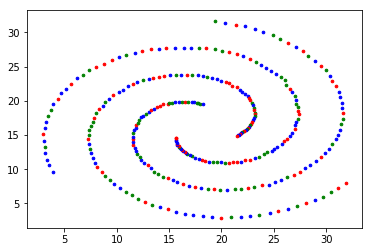

In [112]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [113]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[18.803297, 16.827473],
       [18.162941, 16.138235],
       [18.297058, 16.150736]], dtype=float32)

In [114]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

30032.817415789246


In [115]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5495094401846814


### _Repeating Task 3.c using Cosine Similarity as distance function_

In [116]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = cosine_similarity(X, X)
    
final_clusters = hierarchial_clustering_AverageLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

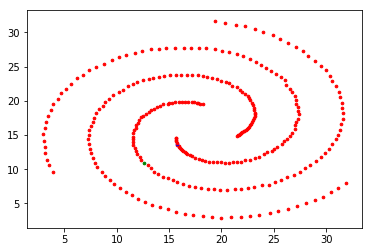

In [117]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [118]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[18.435162, 16.370968],
       [12.65    , 10.9     ],
       [15.8     , 13.65    ]], dtype=float32)

In [119]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

31969.532102226938


In [120]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.33572429713908813


### _Repeating Task 3.d using Cosine Similarity as distance function_

In [121]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = cosine_similarity(X, X)
    
final_clusters = hierarchial_clustering_CentroidLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3.

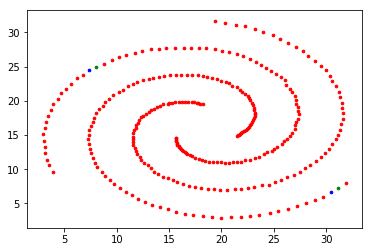

In [122]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [123]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[18.39724, 16.3513 ],
       [19.6    , 16.125  ],
       [18.9    , 15.55   ]], dtype=float32)

In [124]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

31204.919164638803


In [125]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.3396611427158051


## _E5 : L3 distance_

### _Repeating Task 3.a using L3 distance as distance function_

In [76]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = distance.cdist(X,X,'minkowski',p=3)
    
final_clusters = hierarchial_clustering_SingleLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

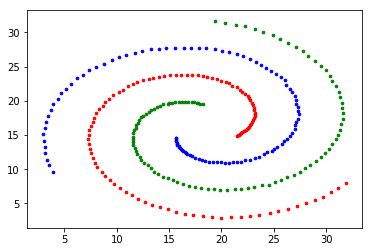

In [77]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [78]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[17.523113, 14.790094],
       [20.425247, 16.325743],
       [17.36143 , 17.93238 ]], dtype=float32)

In [79]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

31730.072372428363


In [80]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

1.0


### _Repeating Task 3.b using L3 distance as distance function_

In [85]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = distance.cdist(X,X,'minkowski',p=3)
    
final_clusters = hierarchial_clustering_CompleteLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

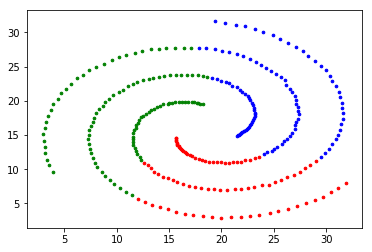

In [86]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [87]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[19.918682 ,  8.8164835],
       [11.015044 , 18.56947  ],
       [24.870832 , 20.360186 ]], dtype=float32)

In [88]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

76966.7150928782


In [89]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5558578613240993


### _Repeating Task 3.c using L3 distance as distance function_

In [134]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = distance.cdist(X,X,'minkowski',p=3)
    
final_clusters = hierarchial_clustering_AverageLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

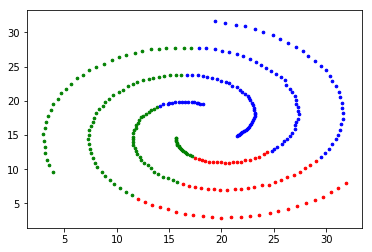

In [93]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [94]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[21.871212 ,  7.6484847],
       [11.031512 , 16.694538 ],
       [23.520472 , 20.53622  ]], dtype=float32)

In [95]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

72539.36928130055


In [96]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5521065215598978


### _Repeating Task 3.d using L3 distance as distance function_

In [135]:
cluster_number=3
cluster_data=[]
    
for i in range(0, len(X)):
    temp = []
    temp.append(i)
    cluster_data.append(temp)
    
distance_matrix = distance.cdist(X,X,'minkowski',p=3)
    
final_clusters = hierarchial_clustering_CentroidLink(cluster_data,cluster_number,distance_matrix)
final_clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

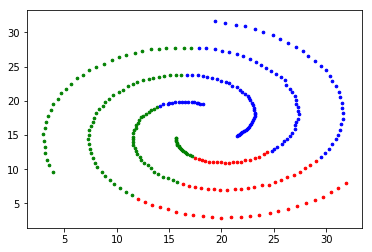

In [136]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(len(X)):
        j = int(final_clusters[i])
        ax.scatter(X[i][0], X[i][1], s=7, c=colors[j-1])

In [137]:
#Calculating centroid of each of 3 clusters
for i in range(k):
    Points = [X[j] for j in range(len(X)) if final_clusters[j] == i+1]
    C[i] = np.mean(Points, axis=0)
C

array([[21.871212 ,  7.6484847],
       [11.031512 , 16.694538 ],
       [23.520472 , 20.53622  ]], dtype=float32)

In [138]:
#Sum of Squared Error, SSE
SSE=0
for i in range(len(X)):
    j = int(clusters[i])
    distance = calculate_distance(X[i],C[j])
    distsquare = math.pow(distance, 2)
    SSE = SSE + distsquare
print(SSE)    

72539.36928130055


In [139]:
#Rand Index (RI)
labels_true = clustnum
labels_pred = final_clusters
ri = rand_score (labels_true, labels_pred)
print(ri)

0.5521065215598978
